# Proyek Akhir: Menyelesaikan Permasalahan

- Nama: Amelia Yunisa
- Email: ameliayunisaa@gmaill.com
- Id Dicoding: A180XBM054

## Persiapan

### Menyiapkan library yang dibutuhkan

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


### Menyiapkan data yang akan digunakan

memuat dataset data.csv yang berisi informasi siswa Jaya Jaya Institut

In [2]:
df = pd.read_csv('data.csv', sep=';')
print(f"Dimensi data: {df.shape}")
df.head()

Dimensi data: (4424, 37)


,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Data Understanding

Tahap ini dilakukan untuk mengetahui tipe data tiap kolom, jumlah data, informasi nilai null dan nilai duplikat serta distribusi Status siswa

In [3]:
print("Jumlah baris dan kolom:", df.shape)
print("Informasi dataset:")
df.info()
print("\nStatistik deskriptif:")
print(df.describe())
print("\nJumlah data NULL per kolom:")
print(df.isnull().sum())

Jumlah baris dan kolom: (4424, 37)
Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_q

## EDA

Tahap ini bertujuan untuk eksplorasi data dengan visualisasi dan statistik untuk melihat distribusi target 'Status' serta hubungan fitur numerik dan kategorikal penting dengan status mahasiswa, termasuk usia, nilai masuk, status finansial, dan nilai semester. Tujuannya untuk memahami pola perbedaan antara mahasiswa yang lulus dan yang dropout.

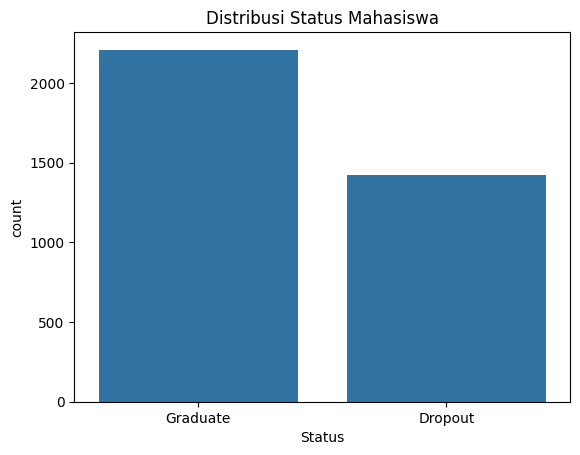

In [10]:
sns.countplot(x='Status', data=df_clean)
plt.title('Distribusi Status Mahasiswa')
plt.xticks(ticks=[0, 1], labels=['Graduate', 'Dropout'])
plt.show()

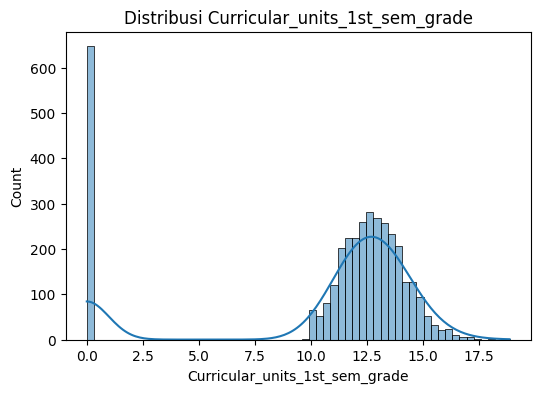

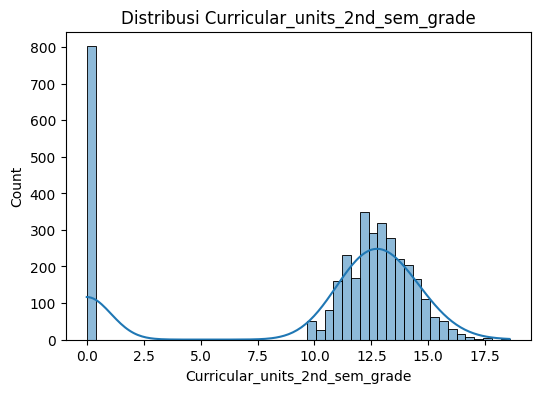

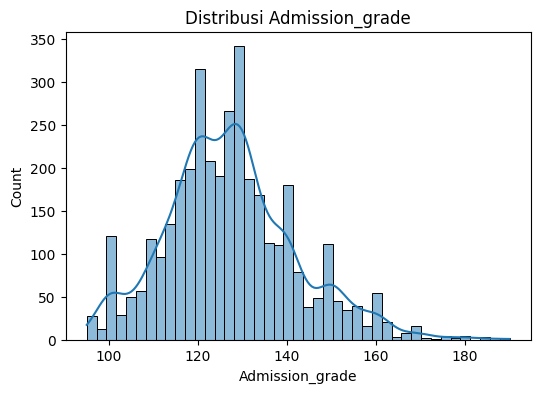

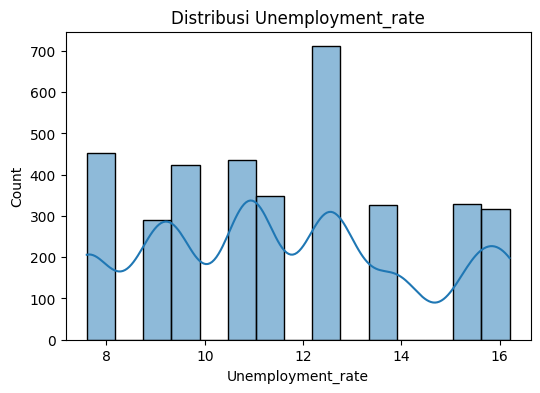

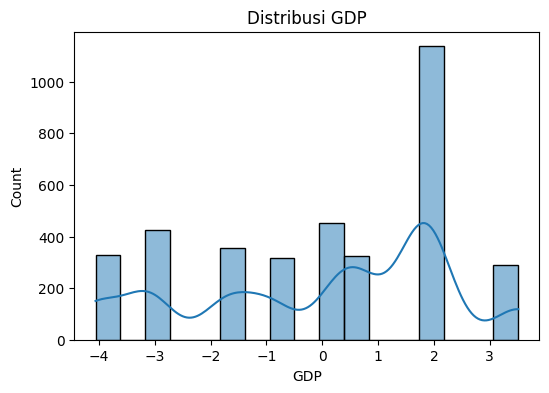

In [11]:
num_cols = [
    'Curricular_units_1st_sem_grade',
    'Curricular_units_2nd_sem_grade',
    'Admission_grade',
    'Unemployment_rate',
    'GDP'
]

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_clean[col], kde=True)
    plt.title(f'Distribusi {col}')
    plt.show()


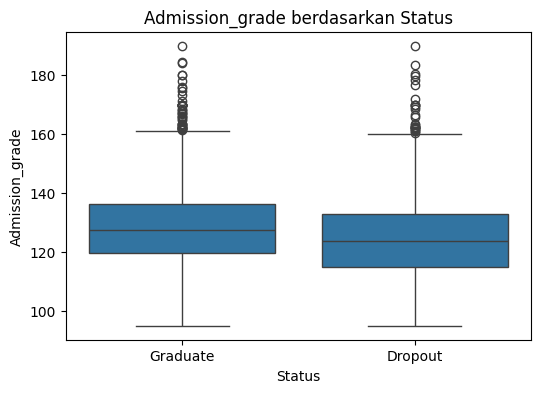

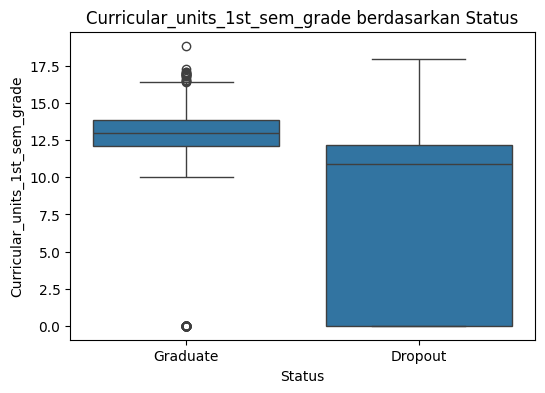

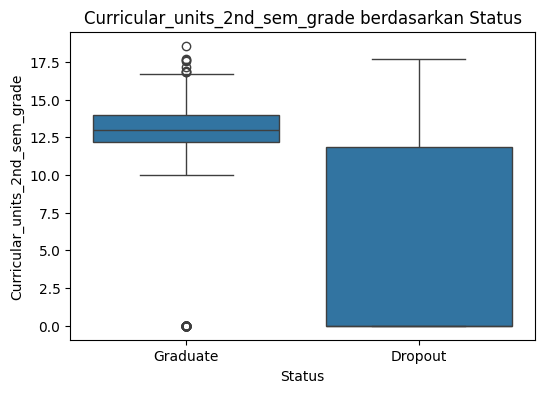

In [12]:
for col in ['Admission_grade', 'Curricular_units_1st_sem_grade', 'Curricular_units_2nd_sem_grade']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Status', y=col, data=df_clean)
    plt.xticks([0, 1], ['Graduate', 'Dropout'])
    plt.title(f'{col} berdasarkan Status')
    plt.show()


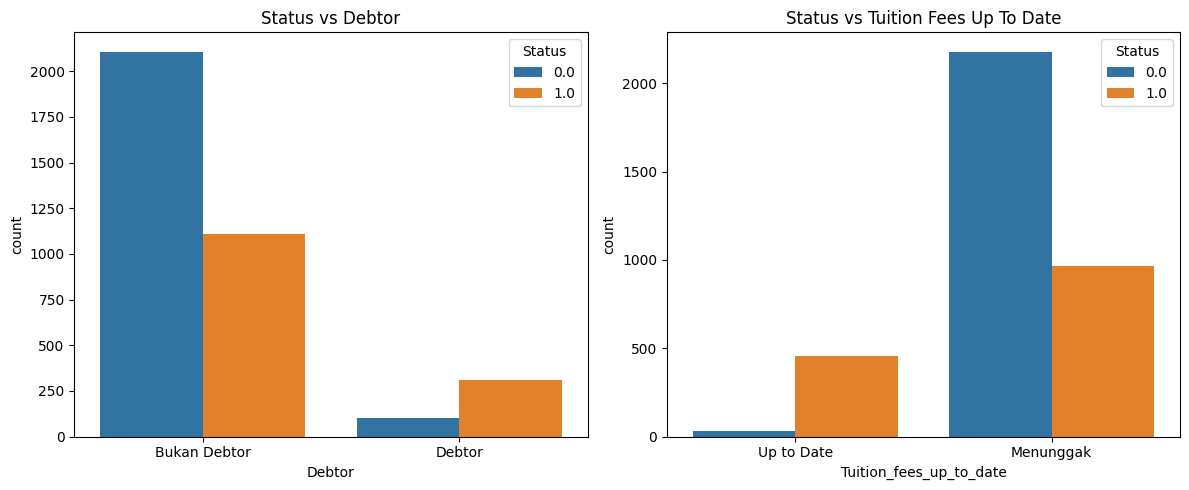

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x='Debtor', hue='Status', data=df_clean, ax=axs[0])
axs[0].set_title('Status vs Debtor')
axs[0].set_xticklabels(['Bukan Debtor', 'Debtor'])

sns.countplot(x='Tuition_fees_up_to_date', hue='Status', data=df_clean, ax=axs[1])
axs[1].set_title('Status vs Tuition Fees Up To Date')
axs[1].set_xticklabels(['Up to Date', 'Menunggak'])

plt.tight_layout()
plt.show()


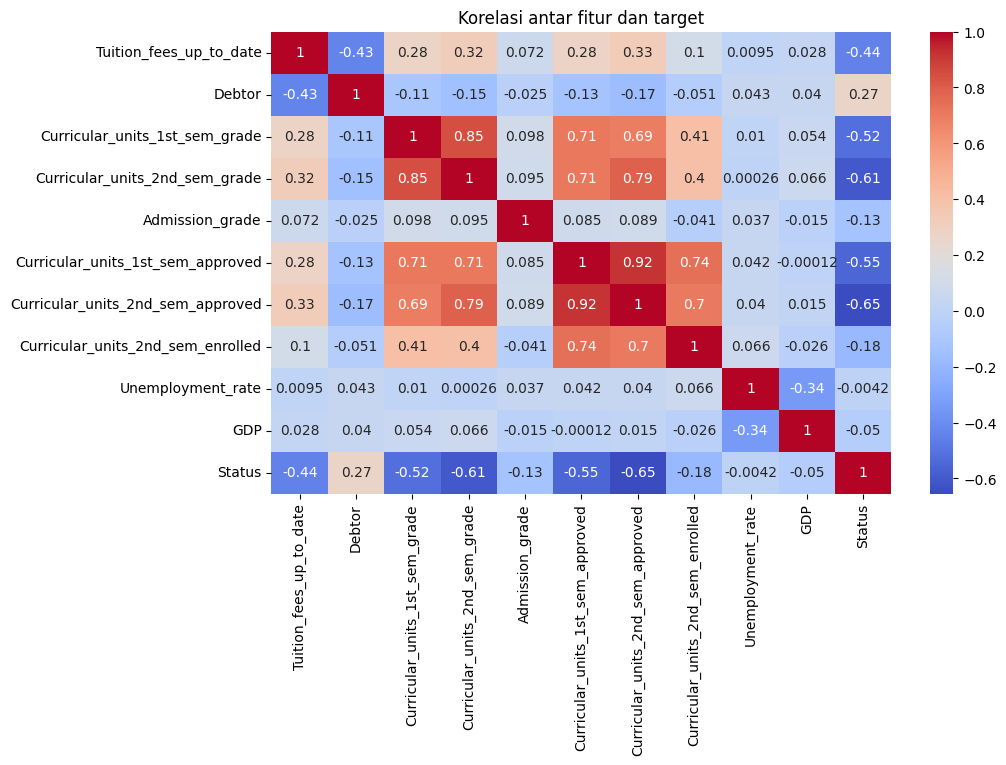

In [14]:
plt.figure(figsize=(10, 6))
corr_matrix = df_clean[selected_features + ['Status']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Korelasi antar fitur dan target')
plt.show()


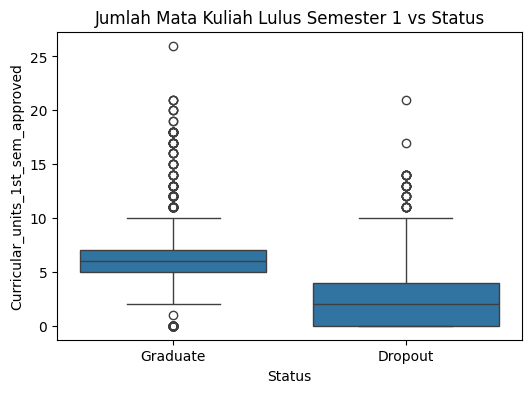

In [15]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Status', y='Curricular_units_1st_sem_approved', data=df_clean)
plt.xticks([0, 1], ['Graduate', 'Dropout'])
plt.title('Jumlah Mata Kuliah Lulus Semester 1 vs Status')
plt.show()


## Data Preparation / Preprocessing

Dataset disiapkan agar bersih dan fokus pada fitur-fitur yang relevan terhadap status mahasiswa. Proses ini penting agar model yang dilatih akurat dan tidak bias.

- Pemilihan Fitur
Dipilih 10 fitur penting terkait akademik, keuangan, dan faktor eksternal yang diduga memengaruhi status kelulusan mahasiswa.

- Filtering Label
Fokus hanya pada dua label: Graduate (0) dan Dropout (1). Data Enrolled dihapus.

- Pembersihan Format Numerik
Format angka yang salah (misal "1.234,56") dibersihkan dan dikonversi ke float.

- Hapus Data Tidak Lengkap
Baris dengan nilai kosong pada fitur penting dihapus untuk menjaga kualitas data.

- Encoding Fitur Kategorikal
Fitur bertipe teks (jika ada) diubah ke angka menggunakan LabelEncoder.

- Split Data
Data dibagi 80:20 untuk training dan testing dengan stratifikasi label agar seimbang.

In [5]:
 # Fitur yang kamu pilih
selected_features = [
    'Tuition_fees_up_to_date', 'Debtor',
    'Curricular_units_1st_sem_grade', 'Curricular_units_2nd_sem_grade',
    'Admission_grade', 'Curricular_units_1st_sem_approved',
    'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_enrolled',
    'Unemployment_rate', 'GDP'
]

# Salin data
df_clean = df.copy()

# Mapping label hanya untuk Graduate dan Dropout (keluarin Enrolled)
label_map = {'Graduate': 0, 'Dropout': 1}
df_clean['Status'] = df_clean['Status'].map(label_map)

# Hapus baris yang label-nya bukan Graduate atau Dropout
df_clean = df_clean.dropna(subset=['Status']).copy()

# Fungsi pembersih angka string
def clean_numeric_string(value):
    if isinstance(value, str):
        value = value.replace('.', '').replace(',', '.')
        try:
            return float(value)
        except:
            return np.nan
    return value

# Terapkan pembersihan ke fitur numerik
for col in selected_features:
    df_clean[col] = df_clean[col].apply(clean_numeric_string)

# Hapus baris yang masih ada null di fitur yang dipakai
df_clean.dropna(subset=selected_features, inplace=True)

# Ekstraksi X dan y
X = df_clean[selected_features].copy()
y = df_clean['Status'].astype(int).copy()

# Encode fitur kategorikal jika ada
label_encoders = {}
categorical_cols = X.select_dtypes(include='object').columns

for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Split data dengan stratifikasi label
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

## Modeling

Tahap ini melatih model Random Forest, memprediksi data test, lalu menyimpan model dengan joblib supaya bisa dipakai ulang untuk prediksi cepat tanpa pelatihan ulang.

In [18]:
# Buat model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Simpan ke Joblib
joblib.dump((rf_model), 'model.pkl')

['model.pkl']

## Evaluation

Tahap ini menampilkan hasil evaluasi model dengan tiga metrik utama:
1. Classification Report
Menyajikan metrik utama seperti precision (ketepatan prediksi positif), recall (kemampuan menangkap semua data positif), f1-score (harmonik rata-rata precision dan recall), serta support (jumlah sampel tiap kelas). Ini membantu memahami performa model secara detail per kelas.

2. Accuracy Score
Mengukur persentase prediksi yang benar dari total data. Mudah dipahami tapi kurang sensitif jika data tidak seimbang antar kelas.

3. Confusion Matrix
Menampilkan matriks yang memperlihatkan jumlah prediksi benar dan salah untuk masing-masing kelas (true positives, false positives, true negatives, false negatives). Berguna untuk analisis kesalahan spesifik model.

In [19]:
# Prediksi
y_pred = rf_model.predict(X_test)

# Evaluasi
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9146005509641874
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       442
           1       0.91      0.87      0.89       284

    accuracy                           0.91       726
   macro avg       0.91      0.91      0.91       726
weighted avg       0.91      0.91      0.91       726

Confusion Matrix:
 [[417  25]
 [ 37 247]]


In [21]:
import sqlite3

# 1. Baca dataset CSV
df = pd.read_csv('data.csv', sep=';')  # ganti dengan nama file aslimu

# 2. Buat koneksi SQLite
conn = sqlite3.connect('data_student.db')  # nama file database

# 3. Simpan ke dalam tabel SQLite (misalnya 'mahasiswa')
df.to_sql('mahasiswa', conn, if_exists='replace', index=False)

# 4. Tutup koneksi
conn.close()

print(f"✅ Berhasil menyimpan {len(df)} baris ke data_student.db (tabel: mahasiswa)")

✅ Berhasil menyimpan 4424 baris ke data_student.db (tabel: mahasiswa)
